<b>Train SVM classifier using sklearn digits dataset </b> (i.e. from sklearn.datasets import load_digits) </br>
and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

In [104]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [105]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [106]:
digits.data.shape

(1797, 64)

3


<Figure size 432x288 with 0 Axes>

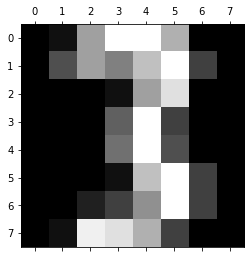

In [107]:
%matplotlib inline
i=175
plt.gray()
plt.matshow(digits.images[i])
print(digits.target[i])

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=10)

In [109]:
x_test.shape

(360, 64)

In [110]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [111]:
rbf_model = svm.SVC(C=2,kernel='rbf',gamma='scale')
rbf_model.fit(x_train,y_train)
rbf_model.score(x_test,y_test)

0.9888888888888889

In [112]:
y_pred_rbf = rbf_model.predict(x_test)
rbf_cm = confusion_matrix(y_test, y_pred_rbf)
rbf_cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]], dtype=int64)

Text(33.0, 0.5, 'Predicted_value')

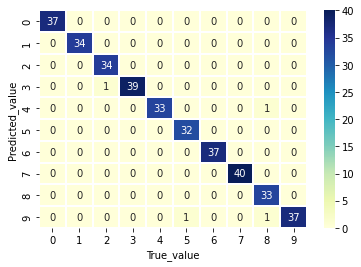

In [113]:
import seaborn as sb
sb.heatmap(rbf_cm, annot=True,linewidths=0.01,cmap="YlGnBu")
plt.xlabel('True_value')
plt.ylabel('Predicted_value')

In [123]:
linear_model = svm.SVC(C=1, kernel='linear')
linear_model.fit(x_train, y_train)
linear_model.score(x_test,y_test)

0.975

In [115]:
y_pred_linear = linear_model.predict(x_test)
linear_cm = confusion_matrix(y_test,y_pred_linear)
linear_cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 36]], dtype=int64)

Text(33.0, 0.5, 'Predicted_value')

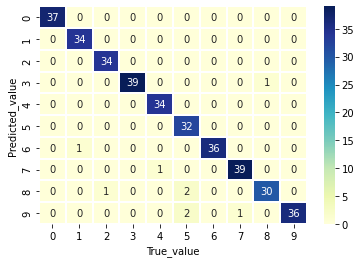

In [116]:
sb.heatmap(linear_cm, annot=True,linewidths=0.01,cmap="YlGnBu")
plt.xlabel('True_value')
plt.ylabel('Predicted_value')